In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\Data Analytics\Project\my_finance_report\my_report.csv", sep = ";")

In [3]:
data = data.set_index('NO')
data.head()

,TANGGAL,KATEGORI,SUB KATEGORI,KETERANGAN,KELUAR,MASUK,AKUN
NO,,,,,,,
1,28/02/2022,KERJA,Gaji,Gaji,,3500000,BCA
2,28/02/2022,TABUNGAN,Sangu,Mamah,,2000000,BCA
3,28/02/2022,LAIN - LAIN,Saldo,Pindah saldo,1720053,,BCA
4,28/02/2022,TABUNGAN,Inves,Bibit,1500000,,BCA
5,28/02/2022,LAIN - LAIN,Saldo,Pindah saldo,,700000,BLU


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 1 to 760
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TANGGAL       760 non-null    object
 1   KATEGORI      760 non-null    object
 2   SUB KATEGORI  760 non-null    object
 3   KETERANGAN    760 non-null    object
 4   KELUAR        760 non-null    object
 5   MASUK         760 non-null    object
 6   AKUN          760 non-null    object
dtypes: object(7)
memory usage: 47.5+ KB


## Fix Data Type

In [5]:
data["KELUAR"] = pd.to_numeric(data["KELUAR"], errors = "coerce")
data["MASUK"] = pd.to_numeric(data["MASUK"], errors = "coerce")

In [6]:
#data["MASUK"].apply(pd.to_numeric(data["MASUK"], errors = "coerce"))

In [7]:
data["TANGGAL"] = pd.to_datetime(data.TANGGAL, format = "%d/%m/%Y")

In [46]:
data.tail()

,TANGGAL,BULAN,HARI,KATEGORI,SUB KATEGORI,KETERANGAN,KELUAR,MASUK,AKUN
NO,,,,,,,,,
756,2022-06-26,06,26,MAKAN,Makan Luar,Lamongan,17000.0,NaN,CASH
757,2022-06-26,06,26,BELANJA,Kebutuhan,Makanan,44000.0,NaN,CASH
758,2022-06-27,06,27,TRANSPORT,Publik,Kereta,236000.0,NaN,BCA
759,2022-06-27,06,27,BELANJA,Hobi,Emblem Motor,82000.0,NaN,BCA
760,2022-06-27,06,27,TABUNGAN,Inves,Seabank,NaN,511756.0,BLU


## Group By

In [9]:
data.groupby(["KATEGORI", "SUB KATEGORI"])[["KELUAR", "MASUK"]].mean()

KELUAR         MASUK
KATEGORI       SUB KATEGORI                                    
BELANJA        Hobi                  2.509836e+05           NaN
               Kebutuhan             9.576177e+04           NaN
               Pakaian               1.399500e+05           NaN
HIBURAN        Entertainment         1.192653e+05           NaN
               Internet & Langganan  3.894500e+04           NaN
               Self Care             2.368136e+05           NaN
JAJAN          Jajan & Rokok         1.697304e+04           NaN
               Kafe                  3.710667e+04           NaN
KERJA          Gaji                           NaN  5.165217e+05
               Reimburse             8.242857e+04  1.669250e+05
LAIN - LAIN    Saldo                 4.277347e+05  4.091304e+05
               Teman                 1.005429e+05  7.169996e+04
MAKAN          Makan Luar            2.484528e+04           NaN
               Online                3.732692e+04           NaN
TABUNGAN       Bunga & Admin         6.061333e+03           NaN
               Inves                 1.377111e+06  5.117560e+05
               Sangu                          NaN  1.583333e+06
TEMPAT TINGGAL Kos                   9.558333e+05  1.500000e+06
               Maintenance           3.359457e+04           NaN
TRANSPORT      Pribadi               6.934483e+04           NaN
               Publik                1.859028e+04           NaN

In [10]:
data[["TANGGAL", "KATEGORI", "KELUAR"]].sort_values(by = ["NO"], ascending = False)

,TANGGAL,KATEGORI,KELUAR
NO,,,
760,2022-06-27,TABUNGAN,NaN
759,2022-06-27,BELANJA,82000.0
758,2022-06-27,TRANSPORT,236000.0
757,2022-06-26,BELANJA,44000.0
756,2022-06-26,MAKAN,17000.0
...,...,...,...
5,2022-02-28,LAIN - LAIN,NaN
4,2022-02-28,TABUNGAN,1500000.0
3,2022-02-28,LAIN - LAIN,1720053.0


Text(0, 0.5, 'Mio')

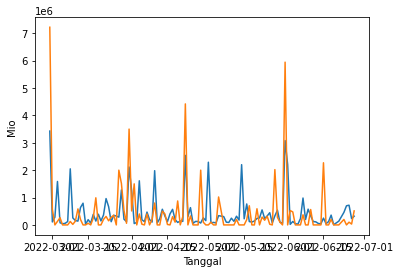

In [31]:
perday = data.groupby("TANGGAL")[["KELUAR", "MASUK"]].sum()
plt.plot(perday)
plt.xlabel("Tanggal")
plt.ylabel("Mio")

In [41]:
data.insert(1, "BULAN",  data['TANGGAL'].dt.strftime('%m'))

In [45]:
data.insert(2, "HARI",  data['TANGGAL'].dt.strftime('%d'))

In [51]:
data.groupby(["BULAN", "HARI"])[["KELUAR", "MASUK"]].sum()

KELUAR      MASUK
BULAN HARI                      
02    28    3427053.0  7220000.0
03    01     109000.0   575000.0
      02     283800.0        0.0
      03    1586630.0   129000.0
      04      79000.0   263000.0
...               ...        ...
06    23     458750.0   200000.0
      24     699000.0        0.0
      25     720000.0   100000.0
      26     229500.0    31000.0
      27     318000.0   511756.0

[117 rows x 2 columns]

## Date Type

In [23]:
data.insert(1, "BULAN",  data["TANGGAL"].dt.month_name())

data

,TANGGAL,BULAN,KATEGORI,SUB KATEGORI,KETERANGAN,KELUAR,MASUK,AKUN
NO,,,,,,,,
1,2022-02-28,February,KERJA,Gaji,Gaji,NaN,3500000.0,BCA
2,2022-02-28,February,TABUNGAN,Sangu,Mamah,NaN,2000000.0,BCA
3,2022-02-28,February,LAIN - LAIN,Saldo,Pindah saldo,1720053.0,NaN,BCA
4,2022-02-28,February,TABUNGAN,Inves,Bibit,1500000.0,NaN,BCA
5,2022-02-28,February,LAIN - LAIN,Saldo,Pindah saldo,NaN,700000.0,BLU
...,...,...,...,...,...,...,...,...
756,2022-06-26,June,MAKAN,Makan Luar,Lamongan,17000.0,NaN,CASH
757,2022-06-26,June,BELANJA,Kebutuhan,Makanan,44000.0,NaN,CASH
758,2022-06-27,June,TRANSPORT,Publik,Kereta,236000.0,NaN,BCA


In [45]:
data.insert(1, "TAHUN",  data["TANGGAL"].dt.year)

data

,TANGGAL,TAHUN,HARI,BULAN,KATEGORI,SUB KATEGORI,KETERANGAN,KELUAR,MASUK,AKUN
NO,,,,,,,,,,
1,2022-02-28,2022,28,February,KERJA,Gaji,Gaji,NaN,3500000.0,BCA
2,2022-02-28,2022,28,February,TABUNGAN,Sangu,Mamah,NaN,2000000.0,BCA
3,2022-02-28,2022,28,February,LAIN - LAIN,Saldo,Pindah saldo,1720053.0,NaN,BCA
4,2022-02-28,2022,28,February,TABUNGAN,Inves,Bibit,1500000.0,NaN,BCA
5,2022-02-28,2022,28,February,LAIN - LAIN,Saldo,Pindah saldo,NaN,700000.0,BLU
...,...,...,...,...,...,...,...,...,...,...
756,2022-06-26,2022,26,June,MAKAN,Makan Luar,Lamongan,17000.0,NaN,CASH
757,2022-06-26,2022,26,June,BELANJA,Kebutuhan,Makanan,44000.0,NaN,CASH
758,2022-06-27,2022,27,June,TRANSPORT,Publik,Kereta,236000.0,NaN,BCA


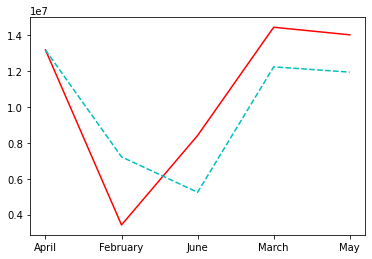

In [73]:
spentPerDay = data.groupby("BULAN")["KELUAR"].sum()
incomePerDay = data.groupby("BULAN")["MASUK"].sum()
plt.plot(spentPerDay, 'r')
plt.plot(incomePerDay, 'c--')